In [11]:
# import required libraries

import xgboost as xgb
import pandas as pd
import os
import numpy as np
import requests
import datetime
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis, x13_arima_select_order
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import copy
import IPython



import random as rn
import numpy as np #대수학
import pandas as pd #전처리
import seaborn as sns #시각화
from matplotlib.patches import Patch
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

import warnings
get_ipython().run_line_magic('matplotlib', 'inline')

import configparser
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

import re
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import os # 경로

import numpy as np
import sys
import random 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, GRU

import configparser
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from statsmodels.multivariate.pca import PCA

In [12]:
# Sets the working directory: the default directory is the one in which the variable list file is stored.

cwd = os.getcwd()
os.chdir(cwd)

In [13]:
# The function receives a response object when given `url'

def get_request_url(url):
    
    try:
        response = requests.get(url)
        if response.status_code == 200:
            print ("[%s]: Url Request Success" % datetime.datetime.now())
            return response.json()
        
    except Exception as e:
        print(e)
        print("[%s]: Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [14]:
# a function that collects a quarterly GDP growth series and future gdp growth

def get_actual_gdp_growth(key, start, end):
        
    stat_code = '200Y002'
    item_code1 = '10111'    
    
    url = f'http://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/1/1000/{stat_code}/Q/{start}/{end}/{item_code1}'
    
    retData = get_request_url(url)
    
    if (retData == None):
        print("there is no data")
        return None
    else:
        
        data = retData['StatisticSearch']
        data = pd.DataFrame(data['row'])
        data = data[['DATA_VALUE', 'TIME']]        
        data.columns = ['GDP_GROWTH', 'TIME']
        
        data['DATE'] = pd.to_datetime(data['TIME']).dt.to_period('Q')
        data = data[['GDP_GROWTH', 'DATE']]    
        data = data.set_index('DATE')

        size = data.shape[0]
        
        gdp_series = data.resample('1M', convention = 'start').pad() 
        gdp_series.index = pd.PeriodIndex(gdp_series.index, freq = 'M')
        
        return gdp_series

In [ ]:
# a function that collects a quarterly GDP growth series and future gdp growth

def get_actual_gdp_growth2(key, start, end):
        
    stat_code = '200Y002'
    item_code1 = '10111'    
    
    url = f'http://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/1/1000/{stat_code}/Q/{start}/{end}/{item_code1}'
    
    retData = get_request_url(url)
    
    if (retData == None):
        print("there is no data")
        return None
    else:
        
        data = retData['StatisticSearch']
        data = pd.DataFrame(data['row'])
        data = data[['DATA_VALUE', 'TIME']]        
        data.columns = ['GDP_GROWTH', 'TIME']
        
        data['DATE'] = pd.to_datetime(data['TIME']).dt.to_period('Q')
        data = data[['GDP_GROWTH', 'DATE']]    
        data = data.set_index('DATE')
        
        data['GDP_GROWTH_F1'] = data['GDP_GROWTH'].shift(periods = -1)
        data['GDP_GROWTH_F2'] = data['GDP_GROWTH'].shift(periods = -2)
        data['GDP_GROWTH_F3'] = data['GDP_GROWTH'].shift(periods = -3)
        
        size = data.shape[0]
        
        gdp_series = data.resample('1M', convention = 'start').pad() 
        gdp_series.index = pd.PeriodIndex(gdp_series.index, freq = 'M')
        
        return gdp_series

In [15]:

# a function which collects the individual feature variable

def get_individual_var(access_key, start, end, stat_code, item_code1, item_code2, freq):
    
    key = access_key
    
    if item_code2 == 0:
        url = f'http://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/1/1000/{stat_code}/{freq}/{start}/{end}/{item_code1}'
    else:
        url = f'http://ecos.bok.or.kr/api/StatisticSearch/{key}/json/kr/1/1000/{stat_code}/{freq}/{start}/{end}/{item_code1}/{item_code2}'
    
    retData = get_request_url(url)
    
    if (retData == None):
        print("there is no data")
        return None
    
    else:
        data = retData['StatisticSearch']
        data = pd.DataFrame(data['row'])
        return data 

In [77]:
raw_data, dic = get_raw_data('7MJBDXDXI03KBLP71JFE', '200001', '202112', 0)
raw_data.to_csv('raw_data.csv')

[2022-07-18 14:29:16.445274]: Url Request Success
[2022-07-18 14:29:17.461198]: Url Request Success
[2022-07-18 14:29:18.292494]: Url Request Success
[2022-07-18 14:29:19.159923]: Url Request Success
[2022-07-18 14:29:20.160372]: Url Request Success
[2022-07-18 14:29:21.058739]: Url Request Success
[2022-07-18 14:29:21.974915]: Url Request Success
[2022-07-18 14:29:23.026001]: Url Request Success
[2022-07-18 14:29:23.907956]: Url Request Success
[2022-07-18 14:29:24.841795]: Url Request Success
[2022-07-18 14:29:25.769726]: Url Request Success
[2022-07-18 14:29:26.620757]: Url Request Success
[2022-07-18 14:29:27.498938]: Url Request Success
[2022-07-18 14:29:28.295056]: Url Request Success
[2022-07-18 14:29:29.148203]: Url Request Success
[2022-07-18 14:29:29.950715]: Url Request Success
[2022-07-18 14:29:30.941864]: Url Request Success
[2022-07-18 14:29:31.848968]: Url Request Success
[2022-07-18 14:29:32.734939]: Url Request Success
[2022-07-18 14:29:33.621961]: Url Request Success


In [16]:

# a function which obtains all monthly variables with additional information (lag, diff, group information)
# `start' and 'end' must be year-month format
# 'ispadding' refers to whether fill missing values for quarterly variable

def get_raw_data(key, start, end, IsPad):
    
    os.chdir("C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts")
    var_list = pd.read_csv('VarList_20220703_NABO.csv')
    num_var = var_list.shape[0]
    varname_set = var_list['VarName'].to_list()
    
    
    # a dictionary which contains the variable's lag structure, seasonality, difference
    
    dic = {}
    
    for i, j in zip(varname_set, range(len(varname_set))):
        dic[i] = {'LAG': var_list.iloc[j]['LAG'], 'DIFF': var_list.iloc[j]['DIFF'],
                  'ISA': var_list.iloc[j]['ISA'], 'GROUP': var_list.iloc[j]['GROUP']}
    
    
    
    # initialize data set: the set which consists of 1 variable
    stat_code = var_list.iloc[0]['STAT_CODE']
    item_code1 = var_list.iloc[0]['ITEM_CODE1']
    item_code2 = var_list.iloc[0]['ITEM_CODE2']
    lags = var_list.iloc[0]['LAG']
    freq = var_list.iloc[0]['FREQ']
    
    
    start_m = pd.to_datetime(start, format ='%Y%m')
    end_m = pd.to_datetime(end, format ='%Y%m')
          
    pi = pd.period_range(start_m, end_m, freq = "Q")
    period_list = list(pi.astype(str))
    
    start_q = period_list[0]
    end_q = period_list[-1]
    
    if freq == 'Q':
        data = get_individual_var(key, start_q, end_q, stat_code, item_code1, item_code2, freq) 
    else:
        data = get_individual_var(key, start, end, stat_code, item_code1, item_code2, freq) 
    
    data = data[['DATA_VALUE', 'TIME']]        
    data.columns = [varname_set[0], 'TIME']
    
    
    if freq == 'M':
        data['DATE'] = pd.to_datetime(data['TIME'], format = '%Y%m')
        data = data[[varname_set[0], 'DATE']]    
        data = data.set_index('DATE')
        data.index = pd.PeriodIndex(data.index, freq = 'M')
    
    else:
        data['DATE'] = pd.to_datetime(data['TIME']).dt.to_period('Q')
        data = data[[varname_set[0], 'DATE']]    
        data = data.set_index('DATE')
        
        if IsPad == 1:
                data = data.resample('1M', convention = 'start').pad()
        else:
                data = data.resample('1M', convention = 'end').last()
        
        data.index = pd.PeriodIndex(data.index, freq = 'M')
    
    
    # collect each variable through for-loop
    
    for i in range(1, num_var):
        
        stat_code = var_list.iloc[i]['STAT_CODE']
        item_code1 = var_list.iloc[i]['ITEM_CODE1']
        item_code2 = var_list.iloc[i]['ITEM_CODE2']
        freq = var_list.iloc[i]['FREQ']
        
        if freq == 'Q':
            var = get_individual_var(key, start_q, end_q, stat_code, item_code1, item_code2, freq) # var denotes the individual variable
        else:
            var = get_individual_var(key, start, end, stat_code, item_code1, item_code2, freq) 
            
        var = var[['DATA_VALUE', 'TIME']]        
        var.columns = [var_list.iloc[i]['VarName'], 'TIME']
  
        if freq == 'M':
            var['DATE'] = pd.to_datetime(var['TIME'], format = '%Y%m')
            var = var[[varname_set[i], 'DATE']]    
            var = var.set_index('DATE')
            var.index = pd.PeriodIndex(var.index, freq = 'M')
    
        else:
            var['DATE'] = pd.to_datetime(var['TIME']).dt.to_period('Q')
            var = var[[varname_set[i], 'DATE']]    
            var = var.set_index('DATE')
            
            if IsPad == 1:
                var = var.resample('1M', convention = 'start').pad()
            else:
                var = var.resample('1M', convention = 'end').last()
            
            var.index = pd.PeriodIndex(var.index, freq = 'M')
    
        data = data.join(var)
        
    return data, dic

In [17]:

# a fuction which returns a vintage data and dictionary of other additional information

def get_vintage_data(start_vintage, end_vintage):
 
    os.chdir("C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts")
    var_list = pd.read_csv('VarList_20220703_NABO.csv')
    varname_set = var_list['VarName'].to_list()
    
    # a dictionary which contains the variable's lag structure, seasonality, difference
    
    dic = {}
    
    for i, j in zip(varname_set, range(len(varname_set))):
        dic[i] = {'LAG': var_list.iloc[j]['LAG'], 'DIFF': var_list.iloc[j]['DIFF'],
                  'ISA': var_list.iloc[j]['ISA'], 'GROUP': var_list.iloc[j]['GROUP'],
                  'FREQ': var_list.iloc[j]['FREQ']}
    
    
    # reading the raw data and reflelct the vintage point
    
    raw_data =pd.read_csv('raw_data.csv')
    raw_data = raw_data.set_index('DATE')
    raw_data.index = pd.PeriodIndex(raw_data.index, freq = 'M')
    data = raw_data[(raw_data.index >= start_vintage) & (raw_data.index <= end_vintage)]
    
    # setting the vintage date points
    
    start_v = pd.to_datetime(start_vintage, format ='%Y%m')
    end_v = pd.to_datetime(end_vintage, format ='%Y%m')
    
    
    # get the month of the end_v
    current_month = end_v.month
    
    first_month = [1, 4, 7, 10]
    middle_month = [2, 5, 8, 11]
    
    
    # sets the current state of forecasting point either 초월, 중월, 말월
    
    state = 2
    
    if current_month in first_month:
        state = 0
    if current_month in middle_month:
        state = 1
    

    size = data.shape[0]
    data = data.astype(float)
   
    for i in varname_set:               
                    
                    num_lag = dic[i]['LAG'] 
                    var_freq = dic[i]['FREQ']
                    
                    if var_freq == 'M':
                        
                        if num_lag == 1:
                            
                            data[i][-1] = np.nan
                            
                        if num_lag== 2:
                            
                            for k in range(num_lag):
                                data[i][size - k - 1] = np.nan
                    
                    if var_freq == 'Q': # quarterly variable's lag is equal to 2 month
                        
                        
                        if state == 2:
                            
                            for k in range(num_lag):
                                data[i][size - k-1] = np.nan
                        else:
                            for k in range(num_lag*2):
                                data[i][size - k - 1] = np.nan
                    
                        
#                         # below is for padded data
                        
#                         if state == 2:
                            
#                             #for k in range(num_lag):
#                             for k in range(num_lag + 1): # for padded data      
#                                 data[i][size - k-1] = np.nan
                        
#                         elif state == 1:
#                             #for k in range(num_lag*2):
#                             for k in range(num_lag*2 + 1): # for padded data   
#                                 data[i][size - k - 1] = np.nan
                                
#                         else:
#                             #for k in range(num_lag*2):
#                             for k in range(num_lag*2 ): # for padded data   
#                                 data[i][size - k - 1] = np.nan        
                    
    data.index = pd.PeriodIndex(data.index, freq = 'M')
    
    return data, dic

In [18]:
# function that transforms into differenced series and seasonally-adjusted series

def transform(vintage_data, dic):
    
    # make a deep copy
    
    data = copy.deepcopy(vintage_data)
    
    # the set of variable names
    col_names = data.columns

    for var in col_names:
        
        # log difference or just difference
        if dic[var]['DIFF'] == 1:
            data[var] = np.log(data[var].astype(float)).diff()
        
        elif dic[var]['DIFF'] == 2:
            data[var] = data[var].astype(float).diff()
        
        else:
            pass

        
        # seasonal adjustment
        if dic[var]['ISA'] == 0:
            
            nan_check = data[var].isnull() 
            idx = data[var].index[nan_check == False]
            
            # checkpoints for where not-NaN value start and end in the time series
            start = np.where(data.index == idx[0])[0][0]
            end = np.where(data.index == idx[-1])[0][0]

            # generate seasnoally-adjusted variable
            
            orig_series = data[var].iloc[start:end+1]
            
            X13PATH = os.chdir("C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts\\x13as")
            arima_res = x13_arima_analysis(endog = orig_series, maxorder = (2, 2), maxdiff = (1, 1), 
                                           x12path = X13PATH)

            # replace the original series with the adjusted variable
            data[var].iloc[start:end +1] = arima_res.seasadj
            
            # reset the currently working directory
            os.chdir("C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts")
        else:
            pass
    
    
    return data

In [53]:
# a function that calculates the optimal number of factors through PCA: Kaiser Criterion

def get_factor_num(data):
    
    pc = PCA(tr_data, standardize = False, missing = 'drop-row')
    ev = pc.eigenvals
    num_factor = np.sum([ev >= 1.0])
    
    return num_factor

In [20]:
# a function which returns the best AR model

def ar_model(y):               
        sel = ar_select_order(y, 12, old_names=False)
        res = sel.model.fit() 
        return res 


In [80]:
# a function which fills missing values with a dynamic factor model
# This model accounts for the complex structure of factor loadings: 
#`dic` arguments must be provided to classify each variable into a certain group that shares the same factor.
# In this model, one global factor, which influences all variables, is assumed. 

def df_model(data, dic, num_factor):
    
    cwd = os.getcwd()
    os.chdir(cwd)
    var_list = pd.read_csv('VarList_20220703_NABO.csv')
    
    num_q = (var_list['FREQ'] == 'Q').sum() # the number of quarterly variables
    
    varname_set = data.columns
    varname_set_q = varname_set[ : num_q].to_list()
    
    endog_q = data[varname_set_q].resample('Q').last()
    endog_q = endog_q.astype(float)
    
    #endog  = data.iloc[ :, num_q : ]
    
    endog  = data

    # factor-loadings structure: 
    
    my_factors = {}
    
    for i in varname_set:
        if dic[i]['GROUP'] != 'NOMINAL':
            my_factors[i] = ['GLOBAL', dic[i]['GROUP']]
        else:
            my_factors[i] = ['GLOBAL']
    
    #my_factors = {i:['GLOBAL', dic[i]['GROUP']] for i in varname_set}
    
    # setting up the Dynamic Factor Model
    
   # model = sm.tsa.DynamicFactorMQ(endog, endog_quarterly = endog_q, factors = num_factor, idiosyncratic_ar1 = True)
    
    model = sm.tsa.DynamicFactorMQ(endog, factors = num_factor, idiosyncratic_ar1 = True)
    
    #model = sm.tsa.DynamicFactorMQ(endog, endog_quarterly = endog_q)
    
    return model

In [60]:
# function which replace the missing values with the DFM


def fill_missing(data, dic):
    
    # NaN Check matrix:
    null_check = data.isnull() 
    
    # sets the opitmal number of factors in the data
    
    new_data = copy.deepcopy(data)
    
    print('Finding the optimal number of factor starts.')
    num_factor = get_factor_num(new_data)
    print('Finding the optimal number of factor ends.')
    
    # fits the DFM model
    
    my_df_model = df_model(data, dic, num_factor)
    res = my_df_model.fit()  
    dfm_forecasts = res.get_prediction(start = data.index[0], end = data.index[-1], information_set = 'smoothed')
        
    # replace missing values with forecasted values generated from the DFM model                                  
    
    null_check_binary = null_check.astype(int)
    filled_data = (1-null_check_binary).mul(np.nan_to_num(data))+(null_check_binary).mul(dfm_forecasts.predicted_mean)
    
    
    filled_data = filled_data[data.columns.to_list()]  
    
    return filled_data         

In [23]:

# a function which gets currently available informaton: 
# note: this function should be used when no forecasts are made on the missing values in the original dataset

def get_current_avail_x(data):
    
    X = data.iloc[:, 1:]
    col_names = X.columns
    
    new_x = np.zeros(X.shape[1])
    null_check = X.isnull() 
    
    
    for i in range(len(col_names)):

        idx = null_check[col_names[i]].index[null_check[col_names[i]] == False]
        end = np.where(X.index == idx[-1])[0][0]
        value = X[col_names[i]].iloc[end]
        new_x[i] = value
    
    return new_x   

In [24]:
# gets the network training

def train_network(X, y, lookback, mask_num):    
    
    seed_num = 1234
    np.random.seed(seed_num)
    rn.seed(seed_num)
    tf.random.set_seed(seed_num)
    
    

    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape= (lookback, X.shape[2])))
    model.add(keras.layers.Masking(mask_value= mask_num))
    model.add(keras.layers.LSTM(10, activation= 'sigmoid', return_sequences = False, 
                                kernel_regularizer = 'l1_l2', recurrent_regularizer = 'l1_l2'))        
    model.add(keras.layers.Dense(1))
    
    
#     inputs = keras.Input(shape=(lookback, X.shape[2]), dtype='float32')
#     masked = keras.layers.Masking(mask_value = mask_num)(inputs)
#     lstm = keras.layers.LSTM(300, activation='sigmoid')(masked)
#     output = keras.layers.Dense(1)(lstm)
#     model = keras.models.Model(inputs, output)
    
    opt = keras.optimizers.SGD(learning_rate= 0.01)
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 100, restore_best_weights= True)
    
    model.compile(optimizer = opt, loss = 'mse', metrics =[keras.metrics.RootMeanSquaredError()])
    model.fit(X,y, batch_size = 32, epochs = 2000, validation_split = 0.25, callbacks = [stop_early])
    return model


In [25]:
# gets the GRU_network training

def train_gru_network(X, y, lookback, mask_num):    
    
    seed_num = 1234
    np.random.seed(seed_num)
    rn.seed(seed_num)
    tf.random.set_seed(seed_num)
    
    
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape= (lookback, X.shape[2])))
    model.add(keras.layers.Masking(mask_value= mask_num))
    model.add(keras.layers.GRU(10, activation= 'sigmoid', return_sequences = False, 
                                kernel_regularizer = 'l1_l2', recurrent_regularizer = 'l1_l2'))        
    model.add(keras.layers.Dense(1))
    
    
#     inputs = keras.Input(shape=(lookback, X.shape[2]), dtype='float32')
#     masked = keras.layers.Masking(mask_value = mask_num)(inputs)
#     lstm = keras.layers.LSTM(300, activation='sigmoid')(masked)
#     output = keras.layers.Dense(1)(lstm)
#     model = keras.models.Model(inputs, output)
    
    opt = keras.optimizers.SGD(learning_rate= 0.01)
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 100, restore_best_weights= True)
    
    model.compile(optimizer = opt, loss = 'mse', metrics =[keras.metrics.RootMeanSquaredError()])
    model.fit(X,y, batch_size = 32, epochs = 2000, validation_split = 0.25, callbacks = [stop_early])
    return model


In [26]:

# a function which yields new instance of X at the foreascasting point
# this is an original function

def get_new_instance(start_m, end_m, lookback, dic, mask_num, step):
    
    data, dic = get_vintage_data(start_m, end_m)
    
    gdp_idx = data[data.iloc[:, 1].notnull()].index.tolist() # the list of index where gdp data is not null
    end_idx = data.index[-1] # end index of vintage dataset
    
    # determine the length of monthly forecasts
    
    if (end_idx.month == 1) | (end_idx.month == 4) | (end_idx.month == 7) | (end_idx.month == 10):
        
        period = pd.period_range(start = end_idx + 1, end = end_idx + 2 + 3*step, freq = 'M')
        
        # create NaN rows up to the end of the quarter
        for m in period:
            data = data.append(pd.Series(name = m)) 
    
    elif (end_idx.month == 2) | (end_idx.month == 5) | (end_idx.month == 8) | (end_idx.month == 11):
        
        period = pd.period_range(start = end_idx + 1, end = end_idx + 1 + 3*step, freq = 'M')
        
        # create NaN rows up to the end of the quarter
        for m in period:
            data = data.append(pd.Series(name = m)) 
    
    else:
        
        if step == 0:
            pass
        else:
            period = pd.period_range(start = end_idx + 1, end = end_idx + 3*step, freq = 'M')
            # create NaN rows up to the end of the quarter
            for m in period:
                data = data.append(pd.Series(name = m)) 
    
    
    # filling the missing values through DFM: 
    
    dataX = data.iloc[:, 1:]
    
    tr_data = transform(dataX, dic)
    filled_data = fill_missing(tr_data, dic)
      
    #filled_data.iloc[:, 1:4].loc[filled_data.iloc[:, 1:4].index > gdp_idx[-1]] = np.nan  # making unobserved gdp nan value
    
    
    scaler = StandardScaler()
    scaler.fit(filled_data)
    X = scaler.transform(filled_data)
    
#    X = X.to_numpy()
    
    new_X = create_lookback_data(X, lookback)
    new_X = np.array(new_X)
    new_inst = new_X[-1]
    
#     arr = []
    
#     for i in range(new_inst.shape[0]):
#         item = new_inst[i]
#         item = item[~np.isnan(item)]
#         arr.append(item)

#     arr = np.array(arr)
#     final_input = keras.preprocessing.sequence.pad_sequences(arr, maxlen = filled_data.shape[1], 
#                                                              padding ='pre', dtype = float, value = mask_num)
    
    return new_inst



In [27]:

# looked backed dataset: a function which returns lookback dataset and target variable

def get_training_data(data, target, lookback):
       
    X = []
    y = []
    
    for i in range(len(data)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(data[(i+j+1)])
        
        X.append(t)
        
        y.append(target[i+lookback+1])    
    
    return X, y

In [28]:
# create loolback dataset excep target variable

def create_lookback_data(data, lookback):
    
    X = []
    
    for i in range(len(data)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(data[(i+j+1)])
        
        X.append(t)
    return X


In [29]:

# state = 0 : first month
# state =1  : middle month
# state = 2: end month
# state = 3: all month


def gen_state_var(simul_data):
    
    simul_data['STATE'] = np.nan
    
    simul_data['STATE'].loc[(simul_data.index.month == 1) | (simul_data.index.month == 4) 
                   | (simul_data.index.month == 7) | (simul_data.index.month == 10)] = 0
      
    simul_data['STATE'].loc[(simul_data.index.month == 2) | (simul_data.index.month == 5) 
                   | (simul_data.index.month == 8) | (simul_data.index.month == 11)] = 1
    
    
    simul_data['STATE'].loc[(simul_data.index.month == 3) | (simul_data.index.month == 6) 
                   | (simul_data.index.month == 9) | (simul_data.index.month == 12)] = 2
    
    simul_data['STATE'] = simul_data['STATE'].astype(int)
    
    return simul_data


In [30]:


# compute RMSE metric
# 'start', end' must be in the form of 'y-m'. For example, '2015-01'
# state = 0 : first month
# state =1  : middle month
# state = 2: end month
# state = 3: all month

def rmse_cal(simul_data, start, end, state):
    
    data = gen_state_var(simul_data)
    
    if state != 3:
        data = data[data['STATE'] == state]
    else:
        pass

    data = data[(data.index <= end) & (data.index >= start) ]
    data = data.astype(float)
    
    fe = data['actual_y'] - data['forecasts'] # forecasting error
    fe2 = fe**2 # squared forecasting error
    val_rmse = np.sqrt(np.mean(fe2))
    
    return val_rmse
    

# compute MAE metric  

def mae_cal(simul_data, start, end, state):

    data = gen_state_var(simul_data)
    
    if state != 3:
        data = data[data['STATE'] == state]
    else:
        pass
 
    data = data[(data.index <= end) & (data.index >= start) ]
    data = data.astype(float)
    
    fe = data['actual_y']- data['forecasts'] # forecasting error
    fe_abs = np.absolute(fe) # absolute values of forecasting error
    val_mae = np.mean(fe_abs)
    
    return val_mae

In [31]:

# a function which runs the out-of-sample forecasting exercise:
# start_q: starting quarter of the whole sample: it must be in the form of '2010Q1'
# end_q: ending quarter of the whole sample: it must be in the form of '2021Q1'
# start_m: starting month of out-of-sample forecasting period: It must be in the form of '201501'
# start_m_training: starting month of the training data
# end_m: ending month of out-of-sample forecasting period: It must be in the form of '202012'
# key: access key to BOK Open API
# lookback: timestep in LSTM
# IsRecursive: 1 if recursive forecasting
# step: forecasting horizon. step = 0 --> current quarter, step = 1 --> next quarter, etc

def do_forecast_ex(start_q, end_q, start_m, end_m, start_m_training, key, lookback, IsRecursive, step):
    
    start_q = start_q # starting quarter of the whole sample 
    end_q = end_q   # ending quarter of the whole sample
    key = key

    simul_data = get_actual_gdp_growth(key, start_q, end_q)
    #simul_data.columns = ['actual_y']
    simul_data.columns = ['actual_y', 'actual_y1', 'actual_y2', 'actual_y3']
    simul_data['forecasts'] = np.nan


    df_pre = simul_data[simul_data.index < start_m] 
    window = len(df_pre)


    df_post = simul_data[simul_data.index >= start_m]
    forecast_horizon = len(df_post)


    # out-of-sample period
    period = pd.period_range(start = start_m, end = end_m, freq = 'M')

    # training sample starting point
    start_index  = pd.Period(start_m_training, freq = 'M')

    start_time = datetime.datetime.now()

    for i in period:

        end_index = start_index + window

        start_m = str(start_index).replace('-', '')
        end_m = str(end_index).replace('-', '')

        # gets the vintage data at the forecasting time
        vintage_data, dic = get_vintage_data(start_m, end_m)

        idx = vintage_data[vintage_data['GDP'].notnull()].index.tolist() # index where gdp growth data is not null.

        y = vintage_data['GDP'] 

        dataX = vintage_data.iloc[:, 1:]


        # transforming the raw data and filling the missing values

        print(f'[{dt.datetime.now()}]: Transforming the original data starts.')
        tr_data = transform(dataX, dic)
        print(f'[{dt.datetime.now()}]: Transforming the original data ends.')

        print(f'[{dt.datetime.now()}]: Filling the missing values starts.')
        filled_data = fill_missing(tr_data, dic)
        print(f'[{dt.datetime.now()}]: Filling the missing values ends.')


        X = filled_data[filled_data.index <= idx[-1]] # features data

        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)


    #    X = X.to_numpy() # this need to be deleted when MinMaxScaler is used.


        y = y[y.index <= idx[-1]]


        # generate the lookbacked train data set with the corresponding label at the quarterly frequency:
        
        lookback = int(lookback)
        mask_num = 0


        train_X, train_y = get_training_data(X, y, lookback)
        train_X = train_X[-1::-3] # this is for quarterly filtering
        train_y = train_y[-1::-3] # this is for quarterly filtering
        train_X = train_X[::-1] # reverse the sequence
        train_y = train_y[::-1] # reverse the sequence

        train_X = np.array(train_X)
        train_X = train_X.reshape(train_X.shape[0], lookback, train_X.shape[2])

        train_y = np.array(train_y)
        train_y = train_y.reshape(train_y.shape[0], 1)

        # gets the trained neural network with given data

        print(f'[{dt.datetime.now()}]: Learning starts.')
        #model = train_network(train_X, train_y, lookback, mask_num)   # lstm algorithm
        
        model = train_gru_network(train_X, train_y, lookback, mask_num) # gru algorithm
        print(f'[{dt.datetime.now()}]: Learning ends.')


        # gets one-step ahead prediction using the trained neural network

        print(f'[{dt.datetime.now()}]: Making a prediction starts.')
        x_obs = get_new_instance(start_m, end_m, lookback, dic, mask_num, step)
        x_obs = x_obs.reshape(1, lookback, x_obs.shape[1])
        x_obs = tf.convert_to_tensor(x_obs, dtype = float)
        y_hat = model.predict(x_obs)
        print('***Prediction ends***')


        print(f'[{dt.datetime.now()}]:Forecasts on GDP growth at {i} is: {y_hat}')
        simul_data['forecasts'].loc[end_index] = y_hat[0][0]
        
        IsRecursive = int(IsRecursive)
        
        if IsRecursive == 1:
            window = window + 1 # for recursive forecasts
        else:
            start_index = start_index + 1 # for rolling-window forecasts
        
    return simul_data
    

In [113]:

start_q = '2001Q1' # whole sample starting point
end_q = '2021Q4'   # whole sample ending point
key = '7MJBDXDXI03KBLP71JFE'
start_m = '201501'
end_m = '202112'
start_m_training = '200101'


#forecasted_data = do_forecast_ex(start_q, end_q, start_m, end_m, start_m_training, key, lookback, IsRecursive)

lookback = 10
IsRecursive = 1
step = 3
simul_data = get_actual_gdp_growth(key, start_q, end_q)
#simul_data.columns = [['actual_y', 'actual_y_F1', 'actual_y_F2', 'actual_y_F3']]
simul_data.columns = [['actual_y']]


forecasts = do_forecast_ex(start_q, end_q, start_m, end_m, start_m_training, key, lookback, IsRecursive, step)
simul_data['forecasts'] = forecasts['forecasts']

[2022-07-18 16:40:35.447537]: Url Request Success
[2022-07-18 16:40:36.264747]: Url Request Success
[2022-07-18 16:40:36.382541]: Transforming the original data starts.
[2022-07-18 16:40:36.391517]: Transforming the original data ends.
[2022-07-18 16:40:36.391517]: Filling the missing values starts.
[2022-07-18 16:42:12.905556]: Filling the missing values ends.
[2022-07-18 16:42:12.914524]: Learning starts.
Epoch 1/2000
2/2 [==============================] - 3s 527ms/step - loss: 5.1134 - root_mean_squared_error: 1.6260 - val_loss: 2.8275 - val_root_mean_squared_error: 0.6022
Epoch 2/2000
2/2 [==============================] - 0s 43ms/step - loss: 4.6787 - root_mean_squared_error: 1.4880 - val_loss: 2.6847 - val_root_mean_squared_error: 0.4743
Epoch 3/2000
2/2 [==============================] - 0s 47ms/step - loss: 4.3294 - root_mean_squared_error: 1.3675 - val_loss: 2.6113 - val_root_mean_squared_error: 0.3958
Epoch 4/2000
2/2 [==============================] - 0s 45ms/step - loss: 4.

Epoch 94/2000
2/2 [==============================] - 0s 64ms/step - loss: 2.6101 - root_mean_squared_error: 0.7424 - val_loss: 2.1877 - val_root_mean_squared_error: 0.3638
Epoch 95/2000
2/2 [==============================] - 0s 60ms/step - loss: 2.6043 - root_mean_squared_error: 0.7412 - val_loss: 2.1838 - val_root_mean_squared_error: 0.3641
Epoch 96/2000
2/2 [==============================] - 0s 57ms/step - loss: 2.5978 - root_mean_squared_error: 0.7395 - val_loss: 2.1802 - val_root_mean_squared_error: 0.3649
Epoch 97/2000
2/2 [==============================] - 0s 61ms/step - loss: 2.5921 - root_mean_squared_error: 0.7385 - val_loss: 2.1772 - val_root_mean_squared_error: 0.3664
Epoch 98/2000
2/2 [==============================] - 0s 61ms/step - loss: 2.5865 - root_mean_squared_error: 0.7375 - val_loss: 2.1737 - val_root_mean_squared_error: 0.3674
Epoch 99/2000
2/2 [==============================] - 0s 60ms/step - loss: 2.5806 - root_mean_squared_error: 0.7363 - val_loss: 2.1694 - val_

2/2 [==============================] - 0s 67ms/step - loss: 2.0898 - root_mean_squared_error: 0.6187 - val_loss: 1.8748 - val_root_mean_squared_error: 0.4132
Epoch 189/2000
2/2 [==============================] - 0s 73ms/step - loss: 2.0836 - root_mean_squared_error: 0.6162 - val_loss: 1.8735 - val_root_mean_squared_error: 0.4155
Epoch 190/2000
2/2 [==============================] - 0s 72ms/step - loss: 2.0751 - root_mean_squared_error: 0.6120 - val_loss: 1.8685 - val_root_mean_squared_error: 0.4139
Epoch 191/2000
2/2 [==============================] - 0s 65ms/step - loss: 2.0702 - root_mean_squared_error: 0.6109 - val_loss: 1.8659 - val_root_mean_squared_error: 0.4145
Epoch 192/2000
2/2 [==============================] - 0s 64ms/step - loss: 2.0649 - root_mean_squared_error: 0.6093 - val_loss: 1.8612 - val_root_mean_squared_error: 0.4131
Epoch 193/2000
2/2 [==============================] - 0s 65ms/step - loss: 2.0601 - root_mean_squared_error: 0.6081 - val_loss: 1.8600 - val_root_mean

2/2 [==============================] - 0s 67ms/step - loss: 1.6821 - root_mean_squared_error: 0.5241 - val_loss: 1.6151 - val_root_mean_squared_error: 0.4588
Epoch 283/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.6777 - root_mean_squared_error: 0.5228 - val_loss: 1.6128 - val_root_mean_squared_error: 0.4597
Epoch 284/2000
2/2 [==============================] - 0s 70ms/step - loss: 1.6740 - root_mean_squared_error: 0.5223 - val_loss: 1.6096 - val_root_mean_squared_error: 0.4596
Epoch 285/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.6704 - root_mean_squared_error: 0.5218 - val_loss: 1.6059 - val_root_mean_squared_error: 0.4588
Epoch 286/2000
2/2 [==============================] - 0s 65ms/step - loss: 1.6672 - root_mean_squared_error: 0.5217 - val_loss: 1.6053 - val_root_mean_squared_error: 0.4613
Epoch 287/2000
2/2 [==============================] - 0s 89ms/step - loss: 1.6635 - root_mean_squared_error: 0.5208 - val_loss: 1.6004 - val_root_mean

2/2 [==============================] - 0s 65ms/step - loss: 1.3667 - root_mean_squared_error: 0.4680 - val_loss: 1.3722 - val_root_mean_squared_error: 0.4764
Epoch 377/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.3641 - root_mean_squared_error: 0.4681 - val_loss: 1.3697 - val_root_mean_squared_error: 0.4766
Epoch 378/2000
2/2 [==============================] - 0s 63ms/step - loss: 1.3614 - root_mean_squared_error: 0.4680 - val_loss: 1.3683 - val_root_mean_squared_error: 0.4776
Epoch 379/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.3584 - root_mean_squared_error: 0.4673 - val_loss: 1.3659 - val_root_mean_squared_error: 0.4780
Epoch 380/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.3554 - root_mean_squared_error: 0.4671 - val_loss: 1.3591 - val_root_mean_squared_error: 0.4735
Epoch 381/2000
2/2 [==============================] - 0s 60ms/step - loss: 1.3529 - root_mean_squared_error: 0.4671 - val_loss: 1.3537 - val_root_mean

2/2 [==============================] - 0s 59ms/step - loss: 1.1134 - root_mean_squared_error: 0.4298 - val_loss: 1.1549 - val_root_mean_squared_error: 0.4777
Epoch 471/2000
2/2 [==============================] - 0s 61ms/step - loss: 1.1110 - root_mean_squared_error: 0.4296 - val_loss: 1.1540 - val_root_mean_squared_error: 0.4793
Epoch 472/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.1084 - root_mean_squared_error: 0.4293 - val_loss: 1.1530 - val_root_mean_squared_error: 0.4806
Epoch 473/2000
2/2 [==============================] - 0s 56ms/step - loss: 1.1062 - root_mean_squared_error: 0.4293 - val_loss: 1.1482 - val_root_mean_squared_error: 0.4780
Epoch 474/2000
2/2 [==============================] - 0s 56ms/step - loss: 1.1044 - root_mean_squared_error: 0.4300 - val_loss: 1.1425 - val_root_mean_squared_error: 0.4739
Epoch 475/2000
2/2 [==============================] - 0s 55ms/step - loss: 1.1022 - root_mean_squared_error: 0.4295 - val_loss: 1.1405 - val_root_mean

2/2 [==============================] - 0s 49ms/step - loss: 0.9094 - root_mean_squared_error: 0.4031 - val_loss: 0.9874 - val_root_mean_squared_error: 0.4922
Epoch 565/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.9075 - root_mean_squared_error: 0.4032 - val_loss: 0.9827 - val_root_mean_squared_error: 0.4889
Epoch 566/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.9054 - root_mean_squared_error: 0.4024 - val_loss: 0.9785 - val_root_mean_squared_error: 0.4868
Epoch 567/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.9036 - root_mean_squared_error: 0.4028 - val_loss: 0.9807 - val_root_mean_squared_error: 0.4908
Epoch 568/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.9017 - root_mean_squared_error: 0.4024 - val_loss: 0.9792 - val_root_mean_squared_error: 0.4910
Epoch 569/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.8998 - root_mean_squared_error: 0.4023 - val_loss: 0.9754 - val_root_mean

2/2 [==============================] - 0s 48ms/step - loss: 0.7443 - root_mean_squared_error: 0.3833 - val_loss: 0.8375 - val_root_mean_squared_error: 0.4912
Epoch 659/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.7431 - root_mean_squared_error: 0.3834 - val_loss: 0.8350 - val_root_mean_squared_error: 0.4899
Epoch 660/2000
2/2 [==============================] - 0s 46ms/step - loss: 0.7419 - root_mean_squared_error: 0.3835 - val_loss: 0.8381 - val_root_mean_squared_error: 0.4942
Epoch 661/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.7400 - root_mean_squared_error: 0.3825 - val_loss: 0.8423 - val_root_mean_squared_error: 0.4993
Epoch 662/2000
2/2 [==============================] - 0s 47ms/step - loss: 0.7384 - root_mean_squared_error: 0.3816 - val_loss: 0.8398 - val_root_mean_squared_error: 0.4988
Epoch 663/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.7367 - root_mean_squared_error: 0.3819 - val_loss: 0.8378 - val_root_mean

2/2 [==============================] - 0s 41ms/step - loss: 0.6140 - root_mean_squared_error: 0.3647 - val_loss: 0.7317 - val_root_mean_squared_error: 0.5022
Epoch 753/2000
2/2 [==============================] - 0s 46ms/step - loss: 0.6126 - root_mean_squared_error: 0.3650 - val_loss: 0.7305 - val_root_mean_squared_error: 0.5020
Epoch 754/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.6116 - root_mean_squared_error: 0.3650 - val_loss: 0.7336 - val_root_mean_squared_error: 0.5057
Epoch 755/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.6108 - root_mean_squared_error: 0.3647 - val_loss: 0.7301 - val_root_mean_squared_error: 0.5031
Epoch 756/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.6092 - root_mean_squared_error: 0.3639 - val_loss: 0.7291 - val_root_mean_squared_error: 0.5036
Epoch 757/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.6078 - root_mean_squared_error: 0.3640 - val_loss: 0.7274 - val_root_mean

2/2 [==============================] - 0s 41ms/step - loss: 0.5165 - root_mean_squared_error: 0.3539 - val_loss: 0.6476 - val_root_mean_squared_error: 0.5071
Epoch 847/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.5155 - root_mean_squared_error: 0.3537 - val_loss: 0.6472 - val_root_mean_squared_error: 0.5074
Epoch 848/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.5146 - root_mean_squared_error: 0.3536 - val_loss: 0.6470 - val_root_mean_squared_error: 0.5081
Epoch 849/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.5134 - root_mean_squared_error: 0.3531 - val_loss: 0.6492 - val_root_mean_squared_error: 0.5108
Epoch 850/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.5121 - root_mean_squared_error: 0.3522 - val_loss: 0.6467 - val_root_mean_squared_error: 0.5096
Epoch 851/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.5109 - root_mean_squared_error: 0.3521 - val_loss: 0.6462 - val_root_mean

2/2 [==============================] - 0s 40ms/step - loss: 0.4425 - root_mean_squared_error: 0.3424 - val_loss: 0.6029 - val_root_mean_squared_error: 0.5275
Epoch 941/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.4423 - root_mean_squared_error: 0.3431 - val_loss: 0.6080 - val_root_mean_squared_error: 0.5320
Epoch 942/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.4419 - root_mean_squared_error: 0.3421 - val_loss: 0.6021 - val_root_mean_squared_error: 0.5273
Epoch 943/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.4412 - root_mean_squared_error: 0.3424 - val_loss: 0.6026 - val_root_mean_squared_error: 0.5286
Epoch 944/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.4401 - root_mean_squared_error: 0.3420 - val_loss: 0.6019 - val_root_mean_squared_error: 0.5288
Epoch 945/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.4395 - root_mean_squared_error: 0.3424 - val_loss: 0.6061 - val_root_mean

2/2 [==============================] - 0s 37ms/step - loss: 0.3895 - root_mean_squared_error: 0.3295 - val_loss: 0.5939 - val_root_mean_squared_error: 0.5607
Epoch 1035/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3877 - root_mean_squared_error: 0.3290 - val_loss: 0.5927 - val_root_mean_squared_error: 0.5601
Epoch 1036/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3875 - root_mean_squared_error: 0.3297 - val_loss: 0.5952 - val_root_mean_squared_error: 0.5626
Epoch 1037/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.3874 - root_mean_squared_error: 0.3300 - val_loss: 0.5968 - val_root_mean_squared_error: 0.5641
Epoch 1038/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3868 - root_mean_squared_error: 0.3291 - val_loss: 0.5969 - val_root_mean_squared_error: 0.5645
Epoch 1039/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.3863 - root_mean_squared_error: 0.3288 - val_loss: 0.5983 - val_root

2/2 [==============================] - 0s 38ms/step - loss: 0.3521 - root_mean_squared_error: 0.3212 - val_loss: 0.5685 - val_root_mean_squared_error: 0.5650
Epoch 1129/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.3507 - root_mean_squared_error: 0.3186 - val_loss: 0.5662 - val_root_mean_squared_error: 0.5638
Epoch 1130/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3495 - root_mean_squared_error: 0.3182 - val_loss: 0.5633 - val_root_mean_squared_error: 0.5619
Epoch 1131/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.3491 - root_mean_squared_error: 0.3187 - val_loss: 0.5702 - val_root_mean_squared_error: 0.5677
Epoch 1132/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.3484 - root_mean_squared_error: 0.3171 - val_loss: 0.5666 - val_root_mean_squared_error: 0.5652
Epoch 1133/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3484 - root_mean_squared_error: 0.3182 - val_loss: 0.5624 - val_root

2/2 [==============================] - 0s 36ms/step - loss: 0.3244 - root_mean_squared_error: 0.3102 - val_loss: 0.5732 - val_root_mean_squared_error: 0.5877
Epoch 1223/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.3241 - root_mean_squared_error: 0.3104 - val_loss: 0.5706 - val_root_mean_squared_error: 0.5860
Epoch 1224/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.3238 - root_mean_squared_error: 0.3110 - val_loss: 0.5764 - val_root_mean_squared_error: 0.5905
Epoch 1225/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.3235 - root_mean_squared_error: 0.3098 - val_loss: 0.5742 - val_root_mean_squared_error: 0.5893
Epoch 1226/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.3230 - root_mean_squared_error: 0.3099 - val_loss: 0.5663 - val_root_mean_squared_error: 0.5828
Epoch 1227/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.3224 - root_mean_squared_error: 0.3095 - val_loss: 0.5716 - val_root

2/2 [==============================] - 0s 33ms/step - loss: 3.2796 - root_mean_squared_error: 0.9473 - val_loss: 2.5286 - val_root_mean_squared_error: 0.3882
Epoch 20/2000
2/2 [==============================] - 0s 32ms/step - loss: 3.2656 - root_mean_squared_error: 0.9424 - val_loss: 2.5236 - val_root_mean_squared_error: 0.3878
Epoch 21/2000
2/2 [==============================] - 0s 34ms/step - loss: 3.2532 - root_mean_squared_error: 0.9383 - val_loss: 2.5029 - val_root_mean_squared_error: 0.3665
Epoch 22/2000
2/2 [==============================] - 0s 34ms/step - loss: 3.2254 - root_mean_squared_error: 0.9259 - val_loss: 2.4993 - val_root_mean_squared_error: 0.3682
Epoch 23/2000
2/2 [==============================] - 0s 36ms/step - loss: 3.2136 - root_mean_squared_error: 0.9221 - val_loss: 2.4974 - val_root_mean_squared_error: 0.3719
Epoch 24/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.1992 - root_mean_squared_error: 0.9168 - val_loss: 2.4946 - val_root_mean_squa

Epoch 67/2000
2/2 [==============================] - 0s 33ms/step - loss: 2.8027 - root_mean_squared_error: 0.7954 - val_loss: 2.2940 - val_root_mean_squared_error: 0.3573
Epoch 68/2000
2/2 [==============================] - 0s 35ms/step - loss: 2.7947 - root_mean_squared_error: 0.7929 - val_loss: 2.2925 - val_root_mean_squared_error: 0.3612
Epoch 69/2000
2/2 [==============================] - 0s 35ms/step - loss: 2.7887 - root_mean_squared_error: 0.7919 - val_loss: 2.2855 - val_root_mean_squared_error: 0.3575
Epoch 70/2000
2/2 [==============================] - 0s 35ms/step - loss: 2.7813 - root_mean_squared_error: 0.7899 - val_loss: 2.2824 - val_root_mean_squared_error: 0.3588
Epoch 71/2000
2/2 [==============================] - 0s 35ms/step - loss: 2.7747 - root_mean_squared_error: 0.7883 - val_loss: 2.2731 - val_root_mean_squared_error: 0.3515
Epoch 72/2000
2/2 [==============================] - 0s 32ms/step - loss: 2.7639 - root_mean_squared_error: 0.7840 - val_loss: 2.2678 - val_

2/2 [==============================] - 0s 34ms/step - loss: 2.2247 - root_mean_squared_error: 0.6488 - val_loss: 1.9654 - val_root_mean_squared_error: 0.4060
Epoch 162/2000
2/2 [==============================] - 0s 34ms/step - loss: 2.2197 - root_mean_squared_error: 0.6477 - val_loss: 1.9603 - val_root_mean_squared_error: 0.4043
Epoch 163/2000
2/2 [==============================] - 0s 35ms/step - loss: 2.2139 - root_mean_squared_error: 0.6460 - val_loss: 1.9565 - val_root_mean_squared_error: 0.4042
Epoch 164/2000
2/2 [==============================] - 0s 34ms/step - loss: 2.2093 - root_mean_squared_error: 0.6454 - val_loss: 1.9534 - val_root_mean_squared_error: 0.4049
Epoch 165/2000
2/2 [==============================] - 0s 35ms/step - loss: 2.2037 - root_mean_squared_error: 0.6439 - val_loss: 1.9510 - val_root_mean_squared_error: 0.4063
Epoch 166/2000
2/2 [==============================] - 0s 34ms/step - loss: 2.1986 - root_mean_squared_error: 0.6427 - val_loss: 1.9463 - val_root_mean

2/2 [==============================] - 0s 36ms/step - loss: 1.7991 - root_mean_squared_error: 0.5571 - val_loss: 1.6989 - val_root_mean_squared_error: 0.4614
Epoch 256/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.7933 - root_mean_squared_error: 0.5546 - val_loss: 1.6924 - val_root_mean_squared_error: 0.4573
Epoch 257/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.7879 - root_mean_squared_error: 0.5522 - val_loss: 1.6851 - val_root_mean_squared_error: 0.4528
Epoch 258/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.7822 - root_mean_squared_error: 0.5500 - val_loss: 1.6810 - val_root_mean_squared_error: 0.4518
Epoch 259/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.7782 - root_mean_squared_error: 0.5492 - val_loss: 1.6780 - val_root_mean_squared_error: 0.4517
Epoch 260/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.7740 - root_mean_squared_error: 0.5481 - val_loss: 1.6761 - val_root_mean

2/2 [==============================] - 0s 33ms/step - loss: 1.4566 - root_mean_squared_error: 0.4903 - val_loss: 1.4286 - val_root_mean_squared_error: 0.4636
Epoch 350/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.4534 - root_mean_squared_error: 0.4899 - val_loss: 1.4243 - val_root_mean_squared_error: 0.4619
Epoch 351/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.4513 - root_mean_squared_error: 0.4905 - val_loss: 1.4192 - val_root_mean_squared_error: 0.4591
Epoch 352/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.4485 - root_mean_squared_error: 0.4902 - val_loss: 1.4154 - val_root_mean_squared_error: 0.4577
Epoch 353/2000
2/2 [==============================] - 0s 33ms/step - loss: 1.4451 - root_mean_squared_error: 0.4893 - val_loss: 1.4146 - val_root_mean_squared_error: 0.4597
Epoch 354/2000
2/2 [==============================] - 0s 33ms/step - loss: 1.4413 - root_mean_squared_error: 0.4881 - val_loss: 1.4169 - val_root_mean

2/2 [==============================] - 0s 34ms/step - loss: 1.1888 - root_mean_squared_error: 0.4507 - val_loss: 1.2015 - val_root_mean_squared_error: 0.4665
Epoch 444/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.1864 - root_mean_squared_error: 0.4502 - val_loss: 1.2035 - val_root_mean_squared_error: 0.4709
Epoch 445/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.1830 - root_mean_squared_error: 0.4488 - val_loss: 1.2004 - val_root_mean_squared_error: 0.4700
Epoch 446/2000
2/2 [==============================] - 0s 33ms/step - loss: 1.1803 - root_mean_squared_error: 0.4485 - val_loss: 1.1998 - val_root_mean_squared_error: 0.4719
Epoch 447/2000
2/2 [==============================] - 0s 33ms/step - loss: 1.1782 - root_mean_squared_error: 0.4487 - val_loss: 1.1953 - val_root_mean_squared_error: 0.4692
Epoch 448/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.1755 - root_mean_squared_error: 0.4478 - val_loss: 1.1939 - val_root_mean

2/2 [==============================] - 0s 32ms/step - loss: 0.9710 - root_mean_squared_error: 0.4206 - val_loss: 1.0186 - val_root_mean_squared_error: 0.4761
Epoch 538/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.9693 - root_mean_squared_error: 0.4213 - val_loss: 1.0153 - val_root_mean_squared_error: 0.4742
Epoch 539/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.9673 - root_mean_squared_error: 0.4208 - val_loss: 1.0126 - val_root_mean_squared_error: 0.4737
Epoch 540/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.9652 - root_mean_squared_error: 0.4209 - val_loss: 1.0096 - val_root_mean_squared_error: 0.4722
Epoch 541/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.9636 - root_mean_squared_error: 0.4209 - val_loss: 1.0101 - val_root_mean_squared_error: 0.4740
Epoch 542/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.9616 - root_mean_squared_error: 0.4200 - val_loss: 1.0071 - val_root_mean

2/2 [==============================] - 0s 35ms/step - loss: 0.7968 - root_mean_squared_error: 0.4016 - val_loss: 0.8558 - val_root_mean_squared_error: 0.4701
Epoch 632/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.7949 - root_mean_squared_error: 0.4004 - val_loss: 0.8525 - val_root_mean_squared_error: 0.4685
Epoch 633/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.7930 - root_mean_squared_error: 0.4003 - val_loss: 0.8515 - val_root_mean_squared_error: 0.4694
Epoch 634/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.7914 - root_mean_squared_error: 0.4005 - val_loss: 0.8526 - val_root_mean_squared_error: 0.4715
Epoch 635/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.7896 - root_mean_squared_error: 0.3992 - val_loss: 0.8519 - val_root_mean_squared_error: 0.4725
Epoch 636/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.7874 - root_mean_squared_error: 0.3987 - val_loss: 0.8519 - val_root_mean

2/2 [==============================] - 0s 33ms/step - loss: 0.6577 - root_mean_squared_error: 0.3841 - val_loss: 0.7386 - val_root_mean_squared_error: 0.4790
Epoch 726/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.6564 - root_mean_squared_error: 0.3839 - val_loss: 0.7381 - val_root_mean_squared_error: 0.4800
Epoch 727/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.6554 - root_mean_squared_error: 0.3845 - val_loss: 0.7375 - val_root_mean_squared_error: 0.4806
Epoch 728/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.6543 - root_mean_squared_error: 0.3846 - val_loss: 0.7370 - val_root_mean_squared_error: 0.4814
Epoch 729/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.6532 - root_mean_squared_error: 0.3847 - val_loss: 0.7365 - val_root_mean_squared_error: 0.4821
Epoch 730/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.6532 - root_mean_squared_error: 0.3863 - val_loss: 0.7361 - val_root_mean

2/2 [==============================] - 0s 42ms/step - loss: 0.5521 - root_mean_squared_error: 0.3715 - val_loss: 0.6573 - val_root_mean_squared_error: 0.4944
Epoch 820/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.5505 - root_mean_squared_error: 0.3710 - val_loss: 0.6546 - val_root_mean_squared_error: 0.4921
Epoch 821/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.5499 - root_mean_squared_error: 0.3709 - val_loss: 0.6516 - val_root_mean_squared_error: 0.4903
Epoch 822/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.5486 - root_mean_squared_error: 0.3710 - val_loss: 0.6545 - val_root_mean_squared_error: 0.4933
Epoch 823/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.5484 - root_mean_squared_error: 0.3706 - val_loss: 0.6474 - val_root_mean_squared_error: 0.4867
Epoch 824/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.5473 - root_mean_squared_error: 0.3699 - val_loss: 0.6495 - val_root_mean

2/2 [==============================] - 0s 34ms/step - loss: 0.4726 - root_mean_squared_error: 0.3594 - val_loss: 0.5976 - val_root_mean_squared_error: 0.5043
Epoch 914/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.4721 - root_mean_squared_error: 0.3591 - val_loss: 0.5979 - val_root_mean_squared_error: 0.5051
Epoch 915/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.4718 - root_mean_squared_error: 0.3594 - val_loss: 0.5947 - val_root_mean_squared_error: 0.5029
Epoch 916/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.4705 - root_mean_squared_error: 0.3589 - val_loss: 0.5932 - val_root_mean_squared_error: 0.5025
Epoch 917/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.4695 - root_mean_squared_error: 0.3589 - val_loss: 0.5920 - val_root_mean_squared_error: 0.5017
Epoch 918/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.4684 - root_mean_squared_error: 0.3582 - val_loss: 0.5949 - val_root_mean

2/2 [==============================] - 0s 32ms/step - loss: 0.4132 - root_mean_squared_error: 0.3454 - val_loss: 0.5688 - val_root_mean_squared_error: 0.5242
Epoch 1008/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.4129 - root_mean_squared_error: 0.3451 - val_loss: 0.5702 - val_root_mean_squared_error: 0.5260
Epoch 1009/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.4122 - root_mean_squared_error: 0.3446 - val_loss: 0.5656 - val_root_mean_squared_error: 0.5226
Epoch 1010/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.4114 - root_mean_squared_error: 0.3448 - val_loss: 0.5661 - val_root_mean_squared_error: 0.5234
Epoch 1011/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.4111 - root_mean_squared_error: 0.3450 - val_loss: 0.5681 - val_root_mean_squared_error: 0.5260
Epoch 1012/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.4108 - root_mean_squared_error: 0.3457 - val_loss: 0.5689 - val_root

2/2 [==============================] - 0s 33ms/step - loss: 0.3712 - root_mean_squared_error: 0.3341 - val_loss: 0.5391 - val_root_mean_squared_error: 0.5296
Epoch 1102/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3698 - root_mean_squared_error: 0.3335 - val_loss: 0.5378 - val_root_mean_squared_error: 0.5285
Epoch 1103/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3694 - root_mean_squared_error: 0.3331 - val_loss: 0.5373 - val_root_mean_squared_error: 0.5287
Epoch 1104/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3688 - root_mean_squared_error: 0.3332 - val_loss: 0.5379 - val_root_mean_squared_error: 0.5299
Epoch 1105/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3684 - root_mean_squared_error: 0.3337 - val_loss: 0.5386 - val_root_mean_squared_error: 0.5301
Epoch 1106/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3684 - root_mean_squared_error: 0.3329 - val_loss: 0.5380 - val_root

2/2 [==============================] - 0s 35ms/step - loss: 0.3412 - root_mean_squared_error: 0.3256 - val_loss: 0.5246 - val_root_mean_squared_error: 0.5383
Epoch 1196/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3403 - root_mean_squared_error: 0.3248 - val_loss: 0.5234 - val_root_mean_squared_error: 0.5372
Epoch 1197/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.3403 - root_mean_squared_error: 0.3250 - val_loss: 0.5262 - val_root_mean_squared_error: 0.5401
Epoch 1198/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.3391 - root_mean_squared_error: 0.3235 - val_loss: 0.5247 - val_root_mean_squared_error: 0.5393
Epoch 1199/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3389 - root_mean_squared_error: 0.3241 - val_loss: 0.5220 - val_root_mean_squared_error: 0.5366
Epoch 1200/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3390 - root_mean_squared_error: 0.3241 - val_loss: 0.5219 - val_root

2/2 [==============================] - 0s 33ms/step - loss: 0.3184 - root_mean_squared_error: 0.3097 - val_loss: 0.5466 - val_root_mean_squared_error: 0.5700
Epoch 1290/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3180 - root_mean_squared_error: 0.3103 - val_loss: 0.5457 - val_root_mean_squared_error: 0.5696
Epoch 1291/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3177 - root_mean_squared_error: 0.3106 - val_loss: 0.5441 - val_root_mean_squared_error: 0.5687
Epoch 1292/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.3184 - root_mean_squared_error: 0.3128 - val_loss: 0.5528 - val_root_mean_squared_error: 0.5757
Epoch 1293/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.3195 - root_mean_squared_error: 0.3133 - val_loss: 0.5522 - val_root_mean_squared_error: 0.5757
Epoch 1294/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.3192 - root_mean_squared_error: 0.3137 - val_loss: 0.5457 - val_root

KeyboardInterrupt: 

In [277]:
simul_data = simul_data.drop(['STATE'], axis = 1)

In [288]:
#simul_data.columns = ['actual_y', 'forecasts']
#simul_data = gen_state_var(simul_data)
start_m = '201501'
end_m = '202012'
rmse_look4 = rmse_cal(simul_data, start_m, end_m, 3)
rmse_look4

0.8391712979604018

In [177]:
# For Results Tables

os.chdir("C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts\\PrelimResults")

res_rolling = pd.read_csv('simulated_data_rolling.csv')
res_rolling = res_rolling.set_index('DATE')
res_rolling.index = pd.PeriodIndex(res_rolling.index, freq = 'M')
res_rolling = gen_state_var(res_rolling)


res_recursive = pd.read_csv('simulated_data_recursive.csv')
res_recursive = res_recursive.set_index('DATE')
res_recursive.index = pd.PeriodIndex(res_recursive.index, freq = 'M')
res_recursive = gen_state_var(res_recursive)


res_dfm_recursive = pd.read_csv('simulated_data_DFM_recursive.csv')
res_dfm_recursive = res_dfm_recursive.set_index('DATE')
res_dfm_recursive.index = pd.PeriodIndex(res_dfm_recursive.index, freq = 'M')
res_dfm_recursive = gen_state_var(res_dfm_recursive)


res_dfm_rolling = pd.read_csv('simulated_data_DFM_rolling.csv')
res_dfm_rolling = res_dfm_rolling.set_index('DATE')
res_dfm_rolling.index = pd.PeriodIndex(res_dfm_rolling.index, freq = 'M')
res_dfm_rolling = gen_state_var(res_dfm_rolling)


res_ar_recursive = pd.read_csv('simulated_data_ARModel_recursive.csv')
res_ar_recursive = res_ar_recursive.set_index('DATE')
res_ar_recursive.index = pd.PeriodIndex(res_ar_recursive.index, freq = 'M')
res_ar_recursive = gen_state_var(res_ar_recursive)


res_ar_rolling = pd.read_csv('simulated_data_ARModel_rolling.csv')
res_ar_rolling = res_ar_rolling.set_index('DATE')
res_ar_rolling.index = pd.PeriodIndex(res_ar_rolling.index, freq = 'M')
res_ar_rolling = gen_state_var(res_ar_rolling)


res_feature_rolling = pd.read_csv('simulated_data_feature_selected_rolling.csv')
res_feature_rolling = res_feature_rolling.set_index('DATE')
res_feature_rolling.index = pd.PeriodIndex(res_feature_rolling.index, freq = 'M')
res_feature_rolling = gen_state_var(res_feature_rolling)


res_feature_recursive = pd.read_csv('simulated_data_feature_selected_recursive.csv')
res_feature_recursive = res_feature_recursive.set_index('DATE')
res_feature_recursive.index = pd.PeriodIndex(res_feature_recursive.index, freq = 'M')
res_feature_recursive = gen_state_var(res_feature_recursive)

In [59]:
new_index = res_recursive.index.strftime('%Y-%m')

In [60]:
new_index

Index(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10',
       ...
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12'],
      dtype='object', name='DATE', length=252)

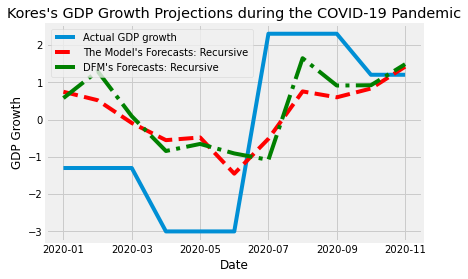

In [313]:
plt.plot(new_index[228:239], res_recursive['actual_y'].iloc[228:239], label = "Actual GDP growth", linestyle ='solid')
plt.plot(new_index[228:239], res_recursive['forecasts'].iloc[228:239], label = "The Model's Forecasts: Recursive", linestyle ='dashed', color ='red')
plt.plot(new_index[228:239], res_dfm_recursive['forecasts'].iloc[228:239], label = "DFM's Forecasts: Recursive", linestyle ='dashdot', color ='green')

plt.xlabel("Date")
plt.ylabel("GDP Growth")
plt.title("Kores's GDP Growth Projections during the COVID-19 Pandemic")
plt.legend()
plt.xticks(new_index[228:239][::2])
plt.show()

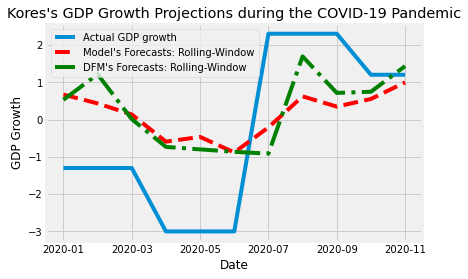

In [312]:
plt.plot(new_index[228:239], res_rolling['actual_y'].iloc[228:239], label = "Actual GDP growth", linestyle ='solid')
plt.plot(new_index[228:239], res_rolling['forecasts'].iloc[228:239], label = "Model's Forecasts: Rolling-Window", linestyle ='dashed', color ='red')
plt.plot(new_index[228:239], res_dfm_rolling['forecasts'].iloc[228:239], label = "DFM's Forecasts: Rolling-Window", linestyle ='dashdot', color ='green')

plt.xlabel("Date")
plt.ylabel("GDP Growth")
plt.title("Kores's GDP Growth Projections during the COVID-19 Pandemic")
plt.legend()
plt.xticks(new_index[228:239][::2])
plt.show()

In [298]:
# For the first month

start_m = '201501'
end_m = '201912'
rmse_dfm_0 = rmse_cal(res_dfm_rolling, start_m, end_m, 0)
rmse_lstm_0 = rmse_cal(res_feature_rolling, start_m, end_m, 0)
rmse_ar_0 = rmse_cal(res_ar_rolling, start_m, end_m, 0)

print('LSTM_0:', rmse_lstm_0)
print('DFM_0:', rmse_dfm_0)
print('AR_0:', rmse_ar_0)

LSTM_0: 0.5004560036386665
DFM_0: 0.5361258181305955
AR_0: 0.5059903961457525


In [299]:
# for the middle month

start_m = '201501'
end_m = '201912'
rmse_dfm_1 = rmse_cal(res_dfm_rolling, start_m, end_m, 1)
rmse_lstm_1 = rmse_cal(res_feature_rolling, start_m, end_m, 1)
rmse_ar_1 = rmse_cal(res_ar_rolling, start_m, end_m, 1)

print('LSTM_1:', rmse_lstm_1)
print('DFM_1:', rmse_dfm_1)
print('AR_1:', rmse_ar_1)

LSTM_1: 0.4412869890626288
DFM_1: 0.49939932875947335
AR_1: 0.5059903961457525


In [300]:
# for the last month

start_m = '201501'
end_m = '201912'
rmse_dfm_2 = rmse_cal(res_dfm_rolling, start_m, end_m, 2)
rmse_lstm_2 = rmse_cal(res_feature_rolling, start_m, end_m, 2)
rmse_ar_2 = rmse_cal(res_ar_rolling, start_m, end_m, 2)

print('LSTM_2:', rmse_lstm_2)
print('DFM_2:', rmse_dfm_2)
print('AR_2:', rmse_ar_2)

LSTM_2: 0.47816116159771616
DFM_2: 0.482258058134921
AR_2: 0.5083688965200168


In [301]:
# for the whole periods


start_m = '201501'
end_m = '201912'

rmse_dfm_3 = rmse_cal(res_dfm_rolling, start_m, end_m, 3)
rmse_lstm_3 = rmse_cal(res_feature_rolling, start_m, end_m, 3)
rmse_ar_3 = rmse_cal(res_ar_rolling, start_m, end_m, 3)

print('LSTM_3:', rmse_lstm_3)
print('DFM_3:', rmse_dfm_3)
print('AR_3:', rmse_ar_3)

LSTM_3: 0.4739298523179786
DFM_3: 0.5064265057135398
AR_3: 0.5067844699450483


In [175]:
res_feature_rolling.tail()

,actual_y,forecasts,STATE
DATE,,,
2021-08,0.2,0.729091,1
2021-09,0.2,0.730357,2
2021-10,1.3,0.721818,0
2021-11,1.3,0.721818,1
2021-12,1.3,0.712500,2


In [245]:
res_lookback = pd.read_csv('lookback_simulation_results_recursive.csv')
res_lookback = res_lookback.set_index('DATE')
idnx = res_dfm_rolling.index
res_lookback.index = pd.PeriodIndex(idnx, freq = 'M')
res_lookback = gen_state_var(res_lookback)
res_lookback

,actual_y,TimeStep_1,TimeStep_2,TimeStep_3,TimeStep_4,TimeStep_5,TimeStep_6,TimeStep_7,TimeStep_8,TimeStep_9,...,TimeStep_16,TimeStep_17,TimeStep_18,TimeStep_19,TimeStep_20,TimeStep_21,TimeStep_22,TimeStep_23,TimeStep_24,STATE
DATE,,,,,,,,,,,,,,,,,,,,,
2001-01,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2001-02,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2001-03,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2001-04,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2001-05,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,0.2,1.661678,1.694270,1.690825,1.707960,1.709897,1.724346,1.759549,1.748086,1.743637,...,1.920570,1.921941,1.922403,1.866666,1.868148,1.869365,1.963651,1.965667,NaN,1
2021-09,0.2,1.395482,1.433831,1.426247,1.512179,1.519578,1.534030,1.625333,1.601506,1.588051,...,1.721691,1.722528,1.722846,1.679777,1.680900,1.682072,1.786997,1.789091,NaN,2
2021-10,1.3,1.227245,1.259988,1.272627,1.353925,1.357479,1.363795,1.440872,1.436665,1.433707,...,1.474696,1.475161,1.475616,1.443700,1.443751,1.443534,1.533228,1.535066,NaN,0


In [260]:
start_m = '201501'
end_m = '201912'

rmse_bylookback = np.zeros(24)
mae_bylookback = np.zeros(24)
rng = np.arange(1,25,1)

for i in rng:
    varname = 'TimeStep_' + str(i)
    series = res_lookback[['actual_y', varname, 'STATE']]    
    series.columns = ['actual_y', 'forecasts', 'STATE']
    rmse_bylookback[i-1] = rmse_cal(series, start_m, end_m, 3)
    mae_bylookback[i-1] = mae_cal(series, start_m, end_m, 3) 

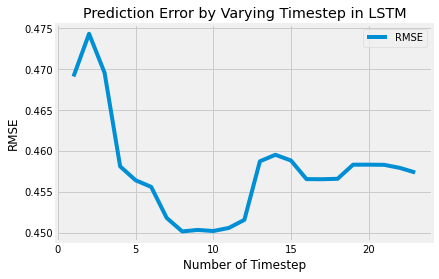

In [261]:
plt.plot(rng, rmse_bylookback, label = "RMSE", linestyle ='solid')
#plt.plot(rng, mae_bylookback, label = "MAE", linestyle ='solid')
plt.xlabel("Number of Timestep")
plt.ylabel("RMSE")
plt.title("Prediction Error by Varying Timestep in LSTM")
plt.legend()
plt.show()

In [248]:
rng = np.arange(1,25,1)
rng

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [229]:
series

,actual_y,forecasts,STATE
DATE,,,
0001-01,1.2,NaN,0
0001-02,1.2,NaN,1
0001-03,1.2,NaN,2
0001-04,1.3,NaN,0
0001-05,1.3,NaN,1
...,...,...,...
0001-08,0.2,1.965667,1
0001-09,0.2,1.789091,2
0001-10,1.3,1.535066,0


In [32]:
import keras_tuner as kt

In [67]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [98]:
def build_gru_model(hp):
    
    model = keras.Sequential()
    
    for i in range(hp.Int('layer_num', 1, 5, step = 1)):
        model.add(keras.layers.GRU(units=hp.Int('units_' + str(i), 5, 100, step= 1),
                                       activation=hp.Choice('act_' + str(i), ['relu', 'tanh', 'sigmoid']),
                                       return_sequences = True))
        model.add(Dropout(hp.Float('drop_rate_' + str(i), 0.1, 0.4, step = 0.1)))
    
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.SGD(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])),
                loss = 'mse', metrics = [keras.metrics.RootMeanSquaredError()])
    
    return model

In [99]:
def build_lstm_model(hp):
    
    model = keras.Sequential()
    
    for i in range(hp.Int('layer_num', 1, 5, step = 1)):
        model.add(keras.layers.LSTM(units=hp.Int('units_' + str(i), 5, 100, step= 1),
                                       activation=hp.Choice('act_' + str(i), ['relu', 'tanh', 'sigmoid']),
                                       return_sequences = True))
        model.add(Dropout(hp.Float('drop_rate_' + str(i), 0.1, 0.4, step = 0.1)))
    
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.SGD(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])),
                loss = 'mse', metrics = [keras.metrics.RootMeanSquaredError()])
    
    return model

In [104]:
tuner_gru = kt.Hyperband(
    build_gru_model,
    objective = 'val_loss',
    #max_trials = 10,
    executions_per_trial = 1,
    #directory = 'C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts',
    overwrite = True,
    max_epochs = 1000,
)

In [101]:
tuner_lstm = kt.Hyperband(
    build_lstm_model,
    objective = 'val_loss',
    #max_trials = 10,
    executions_per_trial = 1,
    #directory = 'C:\\Users\\djpyo\\Desktop\\Papers\\GDP_Forecasts',
    overwrite = True
    #max_epochs = 500,
)

In [81]:
# Hyperparameter Searching Function for LSTM and GRU

start_m = '200101'
end_m="202103"

vintage_data, dic = get_vintage_data(start_m, end_m)

idx = vintage_data[vintage_data['GDP'].notnull()].index.tolist() # index where gdp growth data is not null.

y = vintage_data['GDP'] 
dataX = vintage_data.iloc[:, 1:]


# transforming the raw data and filling the missing values

tr_data = transform(dataX, dic)

print('Filling starts.')
filled_data = fill_missing(tr_data, dic)
print('Filling ends.')

X = filled_data[filled_data.index <= idx[-1]] # features data

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#    X = X.to_numpy() # this need to be deleted when MinMaxScaler is used.

y = y[y.index <= idx[-1]]


# generate the lookbacked train data set with the corresponding label at the quarterly frequency:

lookback = 10
mask_num = 0


train_X, train_y = get_training_data(X, y, lookback)
train_X = train_X[-1::-3] # this is for quarterly filtering
train_y = train_y[-1::-3] # this is for quarterly filtering
train_X = train_X[::-1] # reverse the sequence
train_y = train_y[::-1] # reverse the sequence

train_X = np.array(train_X)
train_X = train_X.reshape(train_X.shape[0], lookback, train_X.shape[2])

train_y = np.array(train_y)
train_y = train_y.reshape(train_y.shape[0], 1)


Filling starts.
Finding the optimal number of factor starts.
Finding the optimal number of factor ends.
Filling ends.


In [82]:
filled_data

,PROD,PRODMAN,PRODSER,PRODMIN,MAFSHIP,MAFINVEN,INTENSITY,LEADINDEX,COINDEX,RETAILSALES,...,LFEND,EXP,IMP,BSI_SALES,BSI_ENV,BSI_MAF_EX,BSI_MAF_INTENSITY,BSI_MAF_DOMESTIC,BSI_MAF_ENV,SENT
DATE,,,,,,,,,,,,,,,,,,,,,
2001-01,-0.014264,-0.003933,0.009148,-0.195831,0.048074,0.104170,101.603000,96.500000,100.200000,0.033856,...,-0.041056,-0.012912,-0.035955,50.661684,101.984847,44.452307,104.367740,93.225507,121.279145,82.978956
2001-02,0.005063,0.010539,-0.012966,0.082400,-0.007848,0.013380,100.780000,96.200000,99.900000,0.014718,...,0.008787,0.054565,0.023944,63.589063,87.200740,56.471879,97.544060,92.305878,96.955737,89.154581
2001-03,0.001682,0.006014,0.001630,0.089008,0.007848,0.005182,101.488000,96.300000,99.800000,-0.001625,...,0.003498,0.056117,0.017103,68.103495,80.941969,61.810031,94.171382,90.421261,87.545568,90.695977
2001-04,0.015013,0.007558,0.012945,0.083754,0.005326,-0.001704,101.424000,96.400000,99.500000,0.017728,...,0.006672,-0.152990,-0.144240,70.203882,78.818108,66.160638,94.017102,90.145940,84.779227,92.133529
2001-05,0.014791,0.008405,0.020685,-0.053906,0.010549,0.000060,101.823000,96.900000,99.700000,0.029900,...,0.011311,0.093339,0.030102,72.264693,77.094452,68.390025,91.864063,88.489806,81.031490,93.098343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,0.005489,0.003663,0.003700,0.017192,-0.008683,-0.010762,98.500000,100.000000,99.400000,0.010471,...,0.009125,0.020611,0.021534,76.000000,78.000000,80.000000,88.000000,83.000000,85.000000,87.400000
2020-12,-0.002741,0.017218,-0.010209,-0.019507,0.022042,0.002701,98.500000,100.200000,99.400000,0.000000,...,-0.002254,0.115090,0.111093,74.000000,75.000000,79.000000,84.000000,81.000000,82.000000,90.500000
2021-01,0.001828,0.004482,-0.002802,-0.164634,0.001894,-0.002701,97.900000,100.500000,99.200000,0.015504,...,0.011092,-0.066977,-0.004073,78.000000,77.000000,87.000000,91.000000,88.000000,85.000000,93.500000


In [105]:
# Hyperparameter Search for GRU

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50)
tuner_lstm.search(train_X, train_y, batch_size = 32, epochs = 2000, validation_split = 0.25, callbacks = [stop_early])

Trial 2074 Complete [00h 00m 15s]
val_loss: 1.1356672048568726

Best val_loss So Far: 1.0801022052764893
Total elapsed time: 06h 57m 02s
INFO:tensorflow:Oracle triggered exit


In [113]:
best_hps_gru=tuner_gru.get_best_hyperparameters(num_trials=1)[0]

In [114]:
# Hyperparameter Search for LSTM

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50)
tuner_lstm.search(train_X, train_y, batch_size = 32, epochs = 2000, validation_split = 0.25, callbacks = [stop_early])

Trial 254 Complete [00h 00m 08s]
val_loss: 1.1958434581756592

Best val_loss So Far: 1.1372483968734741
Total elapsed time: 00h 35m 42s
INFO:tensorflow:Oracle triggered exit


In [40]:
def get_optimal_hyperparam(start_m, end_m, lookback):
    
    vintage_data, dic = get_vintage_data(start_m, end_m)

    idx = vintage_data[vintage_data['GDP'].notnull()].index.tolist() # index where gdp growth data is not null.

    y = vintage_data['GDP'] 
    dataX = vintage_data.iloc[:, 1:]


    # transforming the raw data and filling the missing values

    tr_data = transform(dataX, dic)
    filled_data = fill_missing(tr_data, dic)

    X = filled_data[filled_data.index <= idx[-1]] # features data


    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    #    X = X.to_numpy() # this need to be deleted when MinMaxScaler is used.

    y = y[y.index <= idx[-1]]


    # generate the lookbacked train data set with the corresponding label at the quarterly frequency:

    lookback = 10
    mask_num = 0

    train_X, train_y = get_training_data(X, y, lookback)
    train_X = train_X[-1::-3] # this is for quarterly filtering
    train_y = train_y[-1::-3] # this is for quarterly filtering
    train_X = train_X[::-1] # reverse the sequence
    train_y = train_y[::-1] # reverse the sequence

    train_X = np.array(train_X)
    train_X = train_X.reshape(train_X.shape[0], lookback, train_X.shape[2])

    train_y = np.array(train_y)
    train_y = train_y.reshape(train_y.shape[0], 1)
    
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 50)
    tuner_gru.search(train_X, train_y, batch_size = 32, epochs = 2000, validation_split = 0.25, callbacks = [stop_early])
    
    best_hps=tuner_gru.get_best_hyperparameters(num_trials=1)[0]

    return best_hps

,GDP,PROD,PRODMAN,PRODSER,PRODMIN,MAFSHIP,MAFINVEN,INTENSITY,LEADINDEX,COINDEX,...,LFEND,EXP,IMP,BSI_SALES,BSI_ENV,BSI_MAF_EX,BSI_MAF_INTENSITY,BSI_MAF_DOMESTIC,BSI_MAF_ENV,SENT
DATE,,,,,,,,,,,,,,,,,,,,,
2001-01,NaN,59.1,48.230,62.1,110.699,51.682,48.998,101.603,96.5,100.2,...,921098.6,12644929.0,12431023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02,NaN,59.4,48.741,61.3,120.207,51.278,49.658,100.780,96.2,99.9,...,929227.9,13354074.0,12732258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03,1.2,59.5,49.035,61.4,131.397,51.682,49.916,101.488,96.3,99.8,...,932483.6,14124891.0,12951886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04,NaN,60.4,49.407,62.2,142.876,51.958,49.831,101.424,96.4,99.5,...,938725.7,12121110.0,11212192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05,NaN,61.3,49.824,63.5,135.378,52.509,49.834,101.823,96.9,99.7,...,949403.7,13306959.0,11554834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,NaN,109.6,109.400,108.3,88.000,103.200,110.900,98.500,100.0,99.4,...,4467193.0,45751883.0,39944763.0,76.0,78.0,80.0,88.0,83.0,85.0,87.4
2020-12,1.2,109.3,111.300,107.2,86.300,105.500,111.200,98.500,100.2,99.4,...,4457135.8,51332449.0,44638246.0,74.0,75.0,79.0,84.0,81.0,82.0,90.5
2021-01,NaN,109.5,111.800,106.9,73.200,105.700,110.900,97.900,100.5,99.2,...,4506848.2,48006974.0,44456822.0,78.0,77.0,87.0,91.0,88.0,85.0,93.5


In [ ]:
def merge_nowcast_var(data):
    
    
    